In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv('iris.csv')
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
x=data[data['Species']=='Iris-setosa']
y=data[data['Species']=='Iris-versicolor']
z=data[data['Species']=='Iris-virginica']

setosa=x.drop(['SepalLengthCm','SepalWidthCm','Species','Id'],axis=1)
versicolor=y.drop(['SepalLengthCm','SepalWidthCm','Species','Id'],axis=1)
virginica=z.drop(['SepalLengthCm','SepalWidthCm','Species','Id'],axis=1)


setosa=setosa.iloc[:40,:]
versicolor=versicolor.iloc[:40,:]
virginica=virginica.iloc[:40,:]

setosa=np.array(setosa)
versicolor=np.array(versicolor)
virginica=np.array(virginica)



In [32]:
l1=[x[0] for x in setosa]
l2=[x[1] for x in setosa]

l3=[x[0] for x in versicolor]
l4=[x[1] for x in versicolor]

l5=[x[0] for x in virginica]
l6=[x[1] for x in virginica]

mean1=[sum(l1)/len(l1),sum(l2)/len(l2)]
mean2=[sum(l3)/len(l3),sum(l4)/len(l4)]
mean3=[sum(l5)/len(l5),sum(l6)/len(l6)]

mean1=np.array(mean1)
mean2=np.array(mean2)
mean3=np.array(mean3)

In [33]:
def covariance(X,mean_1):
    X=X-mean_1
    return (np.dot(X.T,X))/(X.shape[0]-1)

In [34]:
def find_case(w1, w2,mean1,mean2):
    cov_w1, cov_w2 = covariance(w1,mean1), covariance(w2,mean2)
    if (cov_w1 == cov_w2).all():
        identity = np.identity(w1.shape[1])
        if ((cov_w1[0, 0] * identity) == cov_w1).all():
            return 1
        else:
            return 2
    else:
        return 3


In [35]:
def discriminant_function(X,mean_1,p,case):
    cov=covariance(X,mean_1)
    inverse=np.linalg.inv(cov)
    det_matrix=np.linalg.det(cov)
    if case==1:
        sigma=cov[0,0]
        A=np.zeros_like(inverse)
        B=mean_1.T/sigma
        C=(-0.5)*np.dot(mean_1.T,mean_1)/sigma+np.log(p)
    elif case==2:
        A=np.zeros_like(inverse)
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)+np.log(p)
    elif case==3:
        A=-0.5*inverse
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)
        C=C-(0.5)*np.log(det_matrix)+np.log(p)
    return lambda x:np.dot(np.dot(x.T,A),x)+np.dot(B.T,x)+C

In [36]:
def discriminant_plot(g1, g2):
    x = np.linspace(-10,10,100)
    y = np.linspace(-10,10,100)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = g1(np.array([X[i,j],Y[i,j]])) - g2(np.array([X[i,j],Y[i,j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([0, 8, -1, 4])

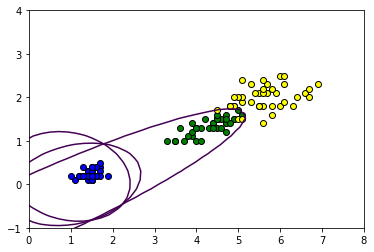

In [39]:
case=find_case(setosa,versicolor,mean1,mean2)
g1=discriminant_function(setosa,mean1,1/3,case)
g2=discriminant_function(versicolor,mean2,1/3,case)
discriminant_plot(g1,g2)


case=find_case(setosa,virginica,mean1,mean3)
g1=discriminant_function(setosa,mean1,1/3,case)
g3=discriminant_function(virginica,mean3,1/3,case)
discriminant_plot(g1,g3)


case=find_case(versicolor,virginica,mean2,mean3)
g1=discriminant_function(versicolor,mean2,1/3,case)
g3=discriminant_function(virginica,mean3,1/3,case)
discriminant_plot(g2,g3)

plt.scatter(l1,l2,color='blue',edgecolors='k')
plt.scatter(l3,l4,color='green',edgecolors='k')
plt.scatter(l5,l6,color='yellow',edgecolors='k')
plt.show()

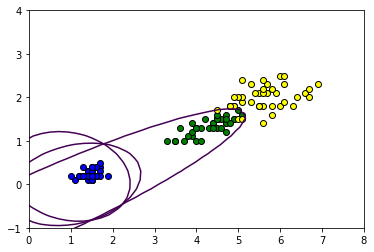

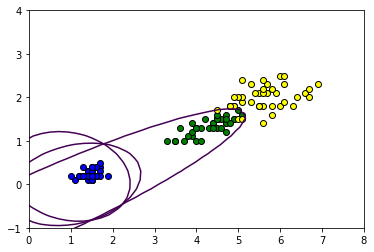

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('iris.csv')

x=data[data['Species']=='Iris-setosa']
y=data[data['Species']=='Iris-versicolor']
z=data[data['Species']=='Iris-virginica']

setosa=x.drop(['SepalLengthCm','SepalWidthCm','Species','Id'],axis=1)
versicolor=y.drop(['SepalLengthCm','SepalWidthCm','Species','Id'],axis=1)
virginica=z.drop(['SepalLengthCm','SepalWidthCm','Species','Id'],axis=1)


setosa=setosa.iloc[:40,:]
versicolor=versicolor.iloc[:40,:]
virginica=virginica.iloc[:40,:]

setosa=np.array(setosa)
versicolor=np.array(versicolor)
virginica=np.array(virginica)

l1=[x[0] for x in setosa]
l2=[x[1] for x in setosa]

l3=[x[0] for x in versicolor]
l4=[x[1] for x in versicolor]

l5=[x[0] for x in virginica]
l6=[x[1] for x in virginica]

mean1=[sum(l1)/len(l1),sum(l2)/len(l2)]
mean2=[sum(l3)/len(l3),sum(l4)/len(l4)]
mean3=[sum(l5)/len(l5),sum(l6)/len(l6)]

mean1=np.array(mean1)
mean2=np.array(mean2)
mean3=np.array(mean3)


def covariance(X,mean_1):
    X=X-mean_1
    return (np.dot(X.T,X))/(X.shape[0]-1)
    

def find_case(w1, w2,mean1,mean2):
    cov_w1, cov_w2 = covariance(w1,mean1), covariance(w2,mean2)
    if (cov_w1 == cov_w2).all():
        identity = np.identity(w1.shape[1])
        if ((cov_w1[0, 0] * identity) == cov_w1).all():
            return 1
        else:
            return 2
    else:
        return 3


def discriminant_function(X,mean_1,p,case):
    cov=covariance(X,mean_1)
    inverse=np.linalg.inv(cov)
    det_matrix=np.linalg.det(cov)
    if case==1:
        sigma=cov[0,0]
        A=np.zeros_like(inverse)
        B=mean_1.T/sigma
        C=(-0.5)*np.dot(mean_1.T,mean_1)/sigma+np.log(p)
    elif case==2:
        A=np.zeros_like(inverse)
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)+np.log(p)
    elif case==3:
        A=-0.5*inverse
        B=np.dot(inverse,mean_1)
        C=(-0.5)*np.dot(np.dot(mean_1.T,inverse),mean_1)
        C=C-(0.5)*np.log(det_matrix)+np.log(p)
    return lambda x:np.dot(np.dot(x.T,A),x)+np.dot(B.T,x)+C
    

def discriminant_plot(g1, g2):
    x = np.linspace(-10,10,100)
    y = np.linspace(-10,10,100)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = g1(np.array([X[i,j],Y[i,j]])) - g2(np.array([X[i,j],Y[i,j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([0, 8, -1, 4])

case=find_case(setosa,versicolor,mean1,mean2)
g1=discriminant_function(setosa,mean1,1/3,case)
g2=discriminant_function(versicolor,mean2,1/3,case)
discriminant_plot(g1,g2)


case=find_case(setosa,virginica,mean1,mean3)
g1=discriminant_function(setosa,mean1,1/3,case)
g3=discriminant_function(virginica,mean3,1/3,case)
discriminant_plot(g1,g3)


case=find_case(versicolor,virginica,mean2,mean3)
g1=discriminant_function(versicolor,mean2,1/3,case)
g3=discriminant_function(virginica,mean3,1/3,case)
discriminant_plot(g2,g3)

plt.scatter(l1,l2,color='blue',edgecolors='k')
plt.scatter(l3,l4,color='green',edgecolors='k')
plt.scatter(l5,l6,color='yellow',edgecolors='k')
plt.show()